___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv('Ecommerce_Customers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.** 

The correlation between the two data points is loose at best, but it is there. Very broadly, people who spend more time on the website spend more money on it later on. Data are also roughly normally distributed.

C:\Users\flier\.conda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


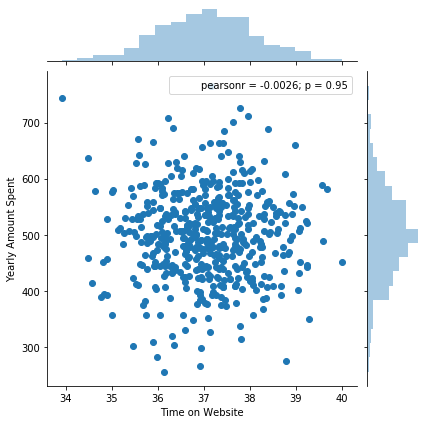

In [7]:
import scipy.stats as stats
j = sns.jointplot(data = customers, x = "Time on Website", y = "Yearly Amount Spent")
j.annotate(stats.pearsonr)

**Make another jointplot but considering Time on App instead** 

The below graph has a much stronger correlation between amount spent and time spent on the app! The pearsonr and p value show us that much, the correlation is highly significant and would be better to explore in a predictive model. 

C:\Users\flier\.conda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


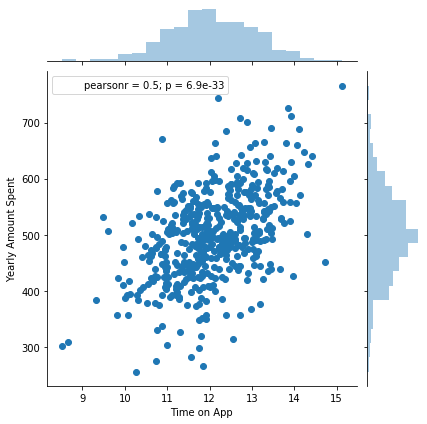

In [8]:
app = sns.jointplot(data = customers, x = "Time on App", y = "Yearly Amount Spent")
app.annotate(stats.pearsonr)

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

Below shows a loose association between time on app and length of membership, but not a particularly strong correlation.

C:\Users\flier\.conda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


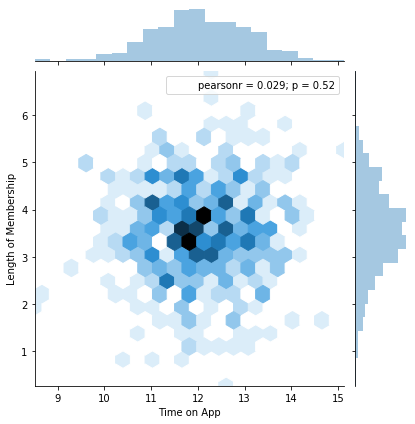

In [9]:
time = sns.jointplot(data = customers, x = "Time on App", y = "Length of Membership", kind = 'hex')
time.annotate(stats.pearsonr)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

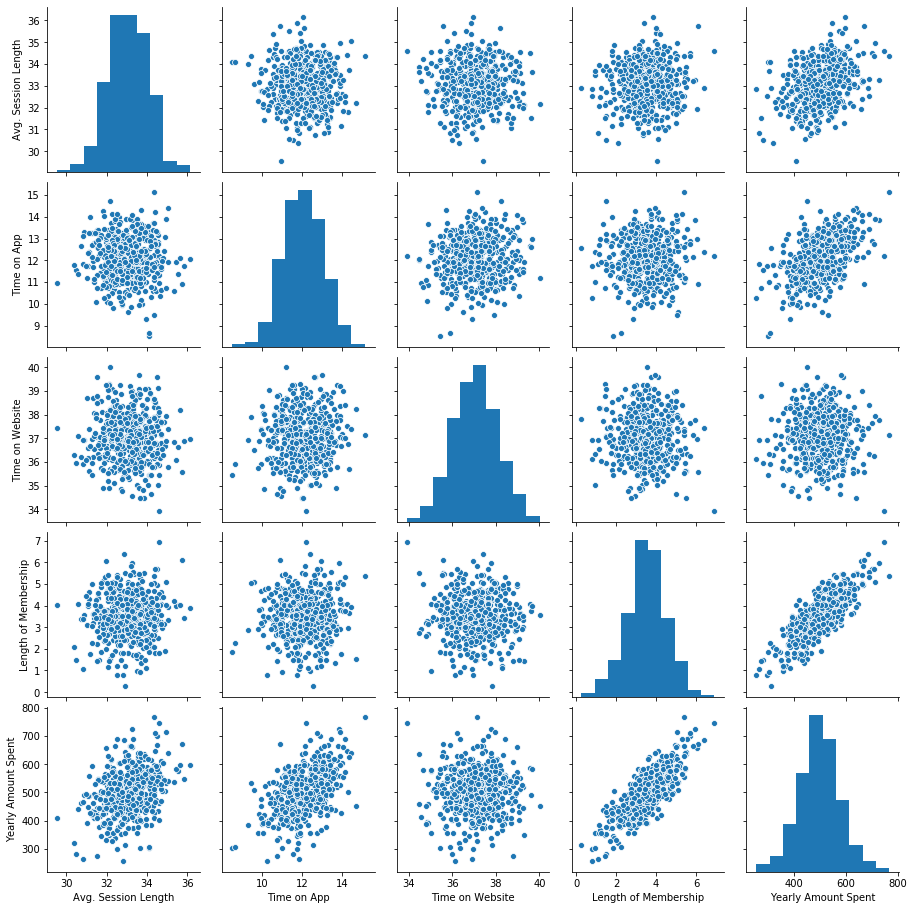

In [10]:
 sns.pairplot(customers)

**Based off above pairplot, length of membership looks to be the most correlated feature with yearly amount spent.** 

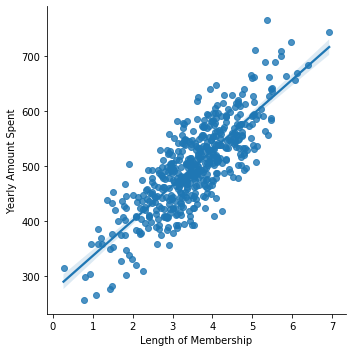

In [13]:
##Now, plot Yearly Amount Spent vs. Length of Membership using sns lmplot
line = sns.lmplot(x = "Length of Membership", y = "Yearly Amount Spent", data = customers)


Above shows LM Plot of length of membership vs early amount spent....good EDA prior to building model! 

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [17]:
customers.info()
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers[['Yearly Amount Spent']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [18]:
#Now, set up train-test-split
from sklearn.model_selection import train_test_split

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [19]:
#Set up train-test-split variables using tuple unpacking! 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [21]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [22]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [23]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [24]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [25]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [29]:
predictions = lm.predict(X_test)

In [30]:
predictions

array([[456.44186104],
       [402.72005312],
       [409.2531539 ],
       [591.4310343 ],
       [590.01437275],
       [548.82396607],
       [577.59737969],
       [715.44428115],
       [473.7893446 ],
       [545.9211364 ],
       [337.8580314 ],
       [500.38506697],
       [552.93478041],
       [409.6038964 ],
       [765.52590754],
       [545.83973731],
       [693.25969124],
       [507.32416226],
       [573.10533175],
       [573.2076631 ],
       [397.44989709],
       [555.0985107 ],
       [458.19868141],
       [482.66899911],
       [559.2655959 ],
       [413.00946082],
       [532.25727408],
       [377.65464817],
       [535.0209653 ],
       [447.80070905],
       [595.54339577],
       [667.14347072],
       [511.96042791],
       [573.30433971],
       [505.02260887],
       [565.30254655],
       [460.38785393],
       [449.74727868],
       [422.87193429],
       [456.55615271],
       [598.10493696],
       [449.64517443],
       [615.34948995],
       [511

In [31]:
y_test

,Yearly Amount Spent
18,452.315675
361,401.033135
104,410.069611
4,599.406092
156,586.155870
...,...
147,479.731938
346,488.387526
423,461.112248
17,407.704548


#### Scatterplot of y_test values (known values) vs. predictions--looks pretty good! I wonder what the residuals plot would look like...

Text(0, 0.5, 'model predictions')

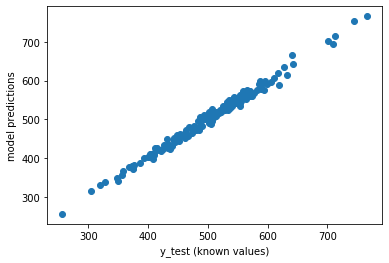

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel("y_test (known values)")
plt.ylabel("model predictions")

## Evaluating the Model

Let's evaluate our model performance by calculating the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error. 



In [34]:
from sklearn import metrics

In [35]:
MAE = metrics.mean_absolute_error(y_test, predictions)

In [36]:
MSE = metrics.mean_squared_error(y_test, predictions)

In [37]:
RMSE = np.sqrt(MSE)

In [38]:
#Print final results
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


## Residuals

Model had a good fit! Makes sense given it's practice data. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed.**

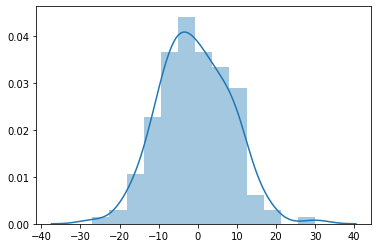

In [39]:
sns.distplot((y_test-predictions))

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [47]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [41]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [49]:
XCols = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']

In [56]:
finaldf = pd.DataFrame(lm.coef_, columns = XCols)
finaldf = finaldf.transpose()
finaldf.columns = ['Coefficient']
finaldf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can we interpret these coefficients??? What do they MEAN?? **

**Do you think the company should focus more on their mobile app or on their website?**

We can loosely interpret these coefficients to mean that for every unit increase in session length (ex: 1 min, though it may be a larger unit than that), the user will spend 25.98 more on the website. Between session length and time on the app, time on the app is undoubtedly more profitable. However, between all of the available metrics, length of membership predicts an increase in spending of 58% more than time on app, at an increase of $ 61 for each unit increase in length of membership.

## In conclusion, the company should spend more time doing what they can to increase the length of membership as it predicts spending much more reliably.